# Non-Negative Matrix Factorization Lab Session

### Arnaud Capitan - TSIA 204

In [62]:
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms

# and IPython.display for audio output
import IPython.display as ipd

# Librosa for audio
import librosa
# # And the display module for visualization
import librosa.display


C:\Users\Arnaud\AppData\Local\Temp\ipykernel_25752\1529239179.py:18: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(20*np.log10(np.abs(X)), origin="lower")


<Figure size 640x480 with 0 Axes>

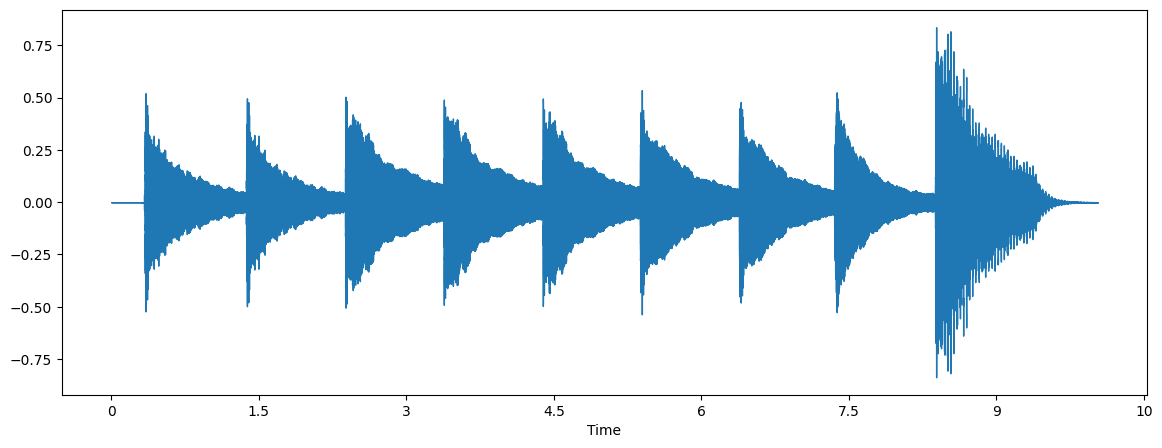

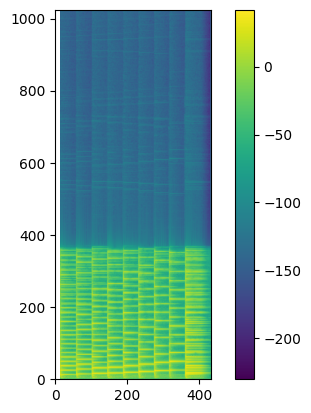

In [63]:
# Audio file
fname = 'Cmajor_piano8khz.wav'

# Load signal
y, sr = librosa.load(fname)

# Compute STFT
Xstft = librosa.stft(y, n_fft=2048, hop_length=512, win_length=None)
X = np.abs(Xstft)

#Visualize the waveform
plt.figure()
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)

#Visualize the spectrum
plt.figure()
plt.imshow(20*np.log10(np.abs(X)), origin="lower")
plt.colorbar()


___

1. By following the technique that we used in the lecture, derive the MUR  (Multiplicative Update Rules) algorithm by yourselves
___

We want to derive the following MUR algorithm :

$$ W \leftarrow W \circ \dfrac{(X \circ \hat{X}^{\beta-2})H^T}{\hat{X}^{\beta-1}H^T} $$

$$ H \leftarrow H \circ \dfrac{W^T (X \circ \hat{X}^{\beta-2})}{W^T\hat{X}^{\beta-1}} $$

With $A \circ B$ being coefficient-wise multiplication of matrix.

According to the subject, we want to solve :

$$ (W^*,H^*) = \argmin _{W \geq 0, H \geq 0} \sum _{i=1}^I \sum _{j=1}^J d_{\beta}(x_{i,j} || \hat{x}_{i,j}) $$ 

With the cost function being the $\beta$-divergence, defined as follows :

$$ d_{\beta} (x||\hat{x}) = \dfrac{x^{\beta}}{\beta (\beta-1)} - \dfrac{x \hat{x}^{\beta -1}}{\beta -1} + \dfrac{\hat{x}^{\beta}}{\beta} $$

We also have $\hat{x}_{i,j} = \sum _{k=1}^K w_{i,k}h_{k,j}$

We set :

$ \gamma = \sum _{i=1}^I \sum _{j=1}^J d_{\beta}(x_{i,j} || \hat{x}_{i,j}) $

$ \gamma = \sum _{i=1}^I \sum _{j=1}^J \dfrac{x_{i,j}^{\beta}}{\beta (\beta-1)} - \dfrac{x_{i,j} \hat{x}_{i,j}^{\beta -1}}{\beta -1} + \dfrac{\hat{x}_{i,j}^{\beta}}{\beta} $

We will start by differentiating $\gamma$ with respect to $W$ ($w_{i,k}$) to obtain a first equation, the with respect to H ($h_{k,j}$)to obtain a second one.

$ \dfrac{\partial \gamma}{\partial w_{i,k}} = \sum _{j=1} ^J \dfrac{\partial \gamma}{\partial \hat{x}_{i,j}} \dfrac{\hat{x}_{i,j}}{\partial w_{i,k}} = \sum _{j=1} ^J (\hat{x}_{i,j}^{\beta-1} - x_{i,j} \hat{x}_{i,j}^{\beta-2})h_{k,j} $

We apply gradient descent with step $\epsilon _{i,k}$ :

$ w_{i,k} \leftarrow w_{i,k} - \epsilon _{i,k} \dfrac{\partial \gamma}{\partial w_{i,k}} $

$ w_{i,k} \leftarrow w_{i,k} - \epsilon _{i,k} \sum _{j=1} ^J (\hat{x}_{i,j}^{\beta-1} - x_{i,j} \hat{x}_{i,j}^{\beta-2})h_{k,j} $


$ w_{i,k} \leftarrow w_{i,k} (1 - \dfrac{\epsilon _{i,k}}{w_{i,k}} \sum _{j=1} ^J (\hat{x}_{i,j}^{\beta-1} - x_{i,j} \hat{x}_{i,j}^{\beta-2})h_{k,j}) $

If we set $\epsilon _{i,k} = \dfrac{w_{i,k}}{\sum _{p=1}^J \hat{x}_{i,p}^{\beta -1} h_{k,p}}$ :

$ w_{i,k} \leftarrow w_{i,k} (1 - \dfrac{1}{\sum _{p=1}^J \hat{x}_{i,p}^{\beta -1} h_{k,p}} \sum _{j=1} ^J (\hat{x}_{i,j}^{\beta-1} - x_{i,j} \hat{x}_{i,j}^{\beta-2})h_{k,j}) $

$ w_{i,k} \leftarrow w_{i,k} \dfrac{\sum _{j=1} ^J x_{i,j} \hat{x}_{i,j}^{\beta-2}h_{k,j}}{\sum _{p=1}^J \hat{x}_{i,p}^{\beta -1} h_{k,p}} $

Since this coefficient update is appliable for every coefficient of our matrix $W$, we get :

$$ W \leftarrow W \circ \dfrac{(X \circ \hat{X}^{\beta-2})H^T}{\hat{X}^{\beta-1}H^T} $$

We do the same for $H$ :

$ \dfrac{\partial \gamma}{\partial h_{k,j}} = \sum _{i=1} ^I \dfrac{\partial \gamma}{\partial \hat{x}_{i,j}} \dfrac{\hat{x}_{i,j}}{\partial h_{k,j}} = \sum _{i=1} ^I (\hat{x}_{i,j}^{\beta-1} - x_{i,j} \hat{x}_{i,j}^{\beta-2})w_{i,k} $

We apply gradient descent with step $\epsilon _{k,j}$ :

$ h_{k,j} \leftarrow h_{k,j} - \epsilon _{k,j} \dfrac{\partial \gamma}{\partial h_{k,j}} $

$ h_{k,j} \leftarrow h_{k,j} - \epsilon _{k,j} \sum _{i=1} ^I (\hat{x}_{i,j}^{\beta-1} - x_{i,j} \hat{x}_{i,j}^{\beta-2})w_{i,k} $

$ h_{k,j} \leftarrow h_{k,j} (1 - \dfrac{\epsilon _{k,j}}{h_{k,j}} \sum _{i=1} ^I (\hat{x}_{i,j}^{\beta-1} - x_{i,j} \hat{x}_{i,j}^{\beta-2})w_{i,k}) $

If we set $\epsilon _{k,j} = \dfrac{h_{k,j}}{\sum _{p=1}^I \hat{x}_{i,p}^{\beta -1} w_{p,k}}$ :

$ h_{k,j} \leftarrow h_{k,j} \dfrac{\sum _{i=1} ^I x_{i,j} \hat{x}_{i,j}^{\beta-2}w_{i,k}}{\sum _{p=1}^I \hat{x}_{i,p}^{\beta -1} w_{i,k}} $

Since this coefficient update is appliable for every coefficient of our matrix $H$, we get :

$$ H \leftarrow H \circ \dfrac{W^T (X \circ \hat{X}^{\beta-2})}{W^T\hat{X}^{\beta-1}} $$

We correctly derived the MUR algorithm for both W and H.
___

Fill in the template provided in the notebook which will require you to implement the MUR update rules.
___

Since we want to avoid division by 0, we will use $\epsilon$ to prevent such issue, as explained during the lab session. 

In [64]:
eps = 0.1

#### 2. Implement MUR for NMF with beta-divergence 

We denote by $L = (X \circ \hat{X}^{\beta - 2})$ 

In [65]:
def W_update(X, W, H, beta):
    X_hat = W @ H
    L = X*(X_hat**(beta-2))
    W_numerator = (L @ H.T) + eps
    W_denominator = ((X_hat**(beta-1)) @ H.T) + eps
    new_W = W * W_numerator/W_denominator
    return new_W
    
def H_update(X, W, H, beta):
    X_hat = W @ H
    L = X*(X_hat**(beta-2))
    H_numerator = (W.T @ L) + eps
    H_denominator = (W.T @ (X_hat**(beta-1))) + eps
    new_H = H * H_numerator / H_denominator
    return new_H

def beta_divergence(X, W, H, beta):
    X_hat = W @ H
    res = 0
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            res += beta_divergence_scalar(X[i, j], X_hat[i, j], beta)
    return res
            
def beta_divergence_scalar(x, x_hat, beta):
    res = ((x**beta)/(beta*(beta-1)))-((x*(x_hat**(beta-1)))/(beta-1))+((x_hat**beta)/beta)
    return res

___
#### 3. Experiment with the algorithm parameters, such as $\beta$, number of columns in $W$, STFT window size, hop size, etc. 

#### What do you observe ?

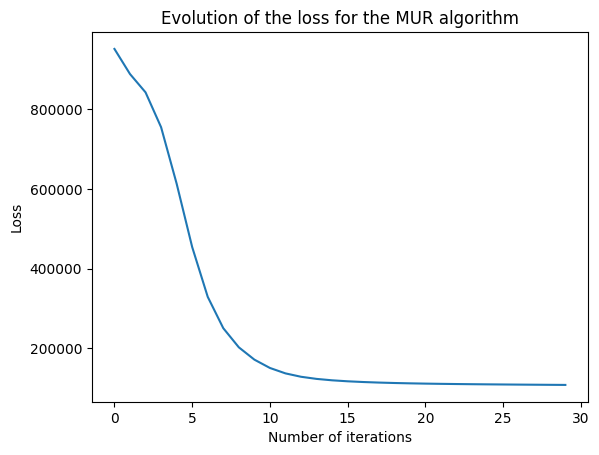

In [70]:
X = np.abs(Xstft)
K = 8 #Order of the dimension reduction, there are 8 notes
W = np.random.rand(X.shape[0], K)
H = np.random.rand(K, X.shape[1])

N = 30 #Number of iteration
beta = 2
errors = []

for k in range(N):
    W = W_update(X, W, H, beta)
    H = H_update(X, W, H, beta)
    errors.append(beta_divergence(X, W, H, beta))

plt.plot([i for i in range (len(errors))],errors)
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Evolution of the loss for the MUR algorithm')
plt.show()

We correctly get a decreasing graph, as expected. Our algorithm converges.

<Figure size 640x480 with 0 Axes>

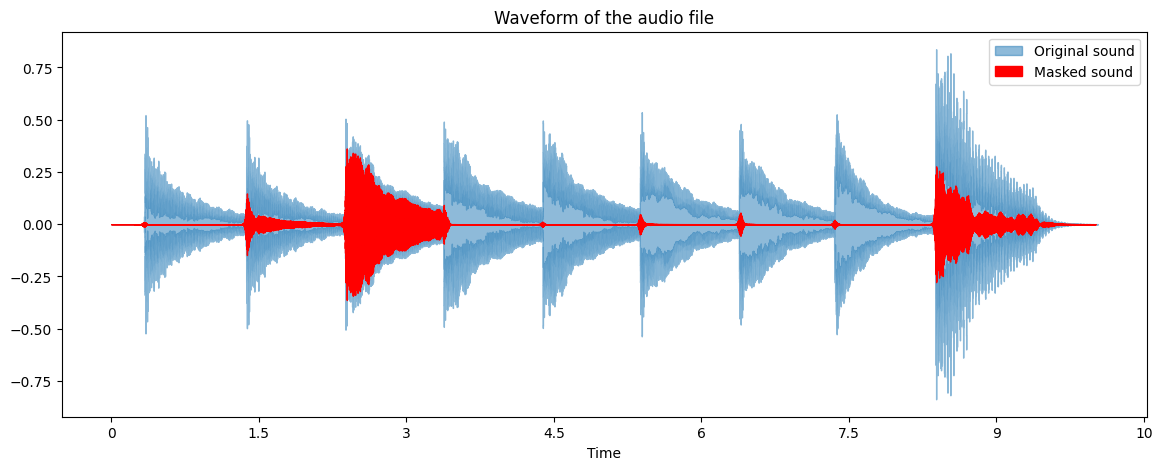

In [67]:
filter_num = np.outer(W[:, 0].reshape(-1), H[0, :].reshape(-1))
filter_denom = W @ H
filter = filter_num/filter_denom
X_0 = np.multiply(Xstft, filter)
y_hat = librosa.istft(X_0)

plt.figure()
plt.figure(figsize=(14, 5))
plt.title('Waveform of the audio file')
librosa.display.waveshow(y, sr=sr, alpha=0.5, label='Original sound')
librosa.display.waveshow(y_hat, sr=sr, color='r', label='Masked sound')
plt.legend()

Even if there are slight errors on the first, fourth and seventh notes, we correctly have isolated the eight, by having the whole sound of it.
The algorithm works.

We plot all the other isolated notes :

<Figure size 640x480 with 0 Axes>

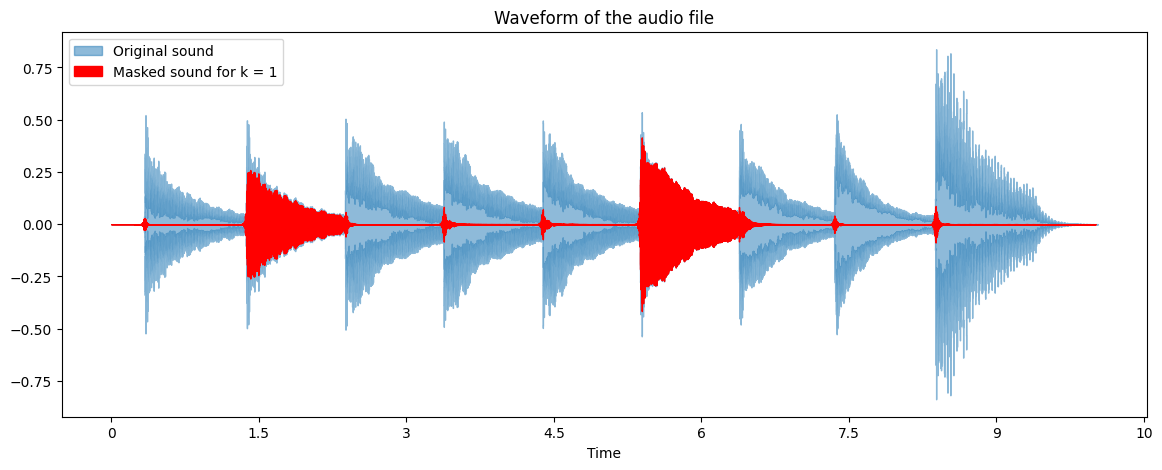

<Figure size 640x480 with 0 Axes>

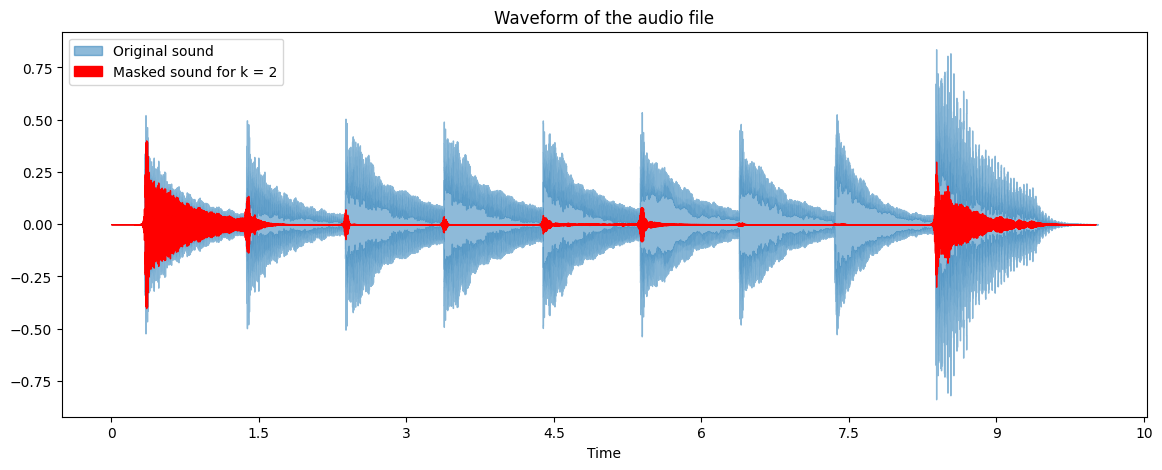

<Figure size 640x480 with 0 Axes>

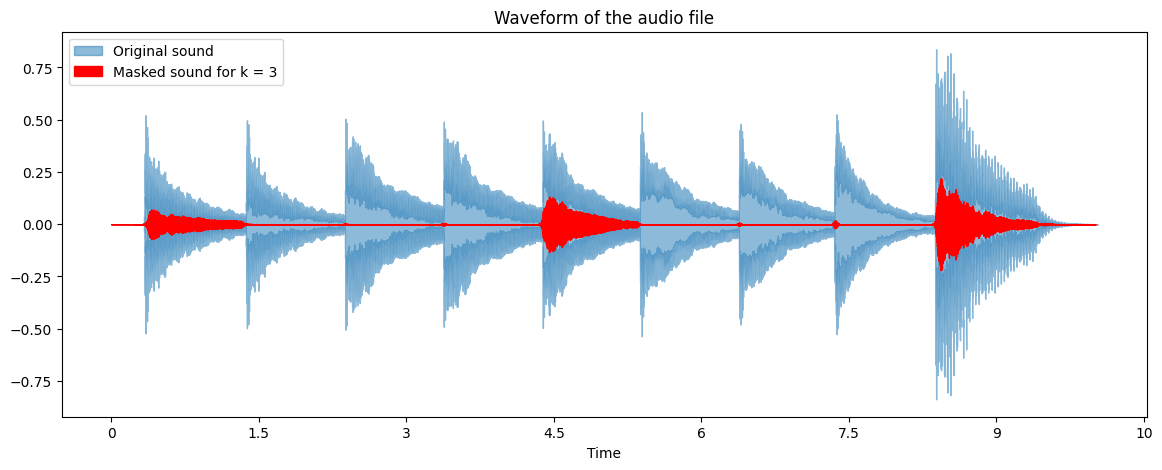

<Figure size 640x480 with 0 Axes>

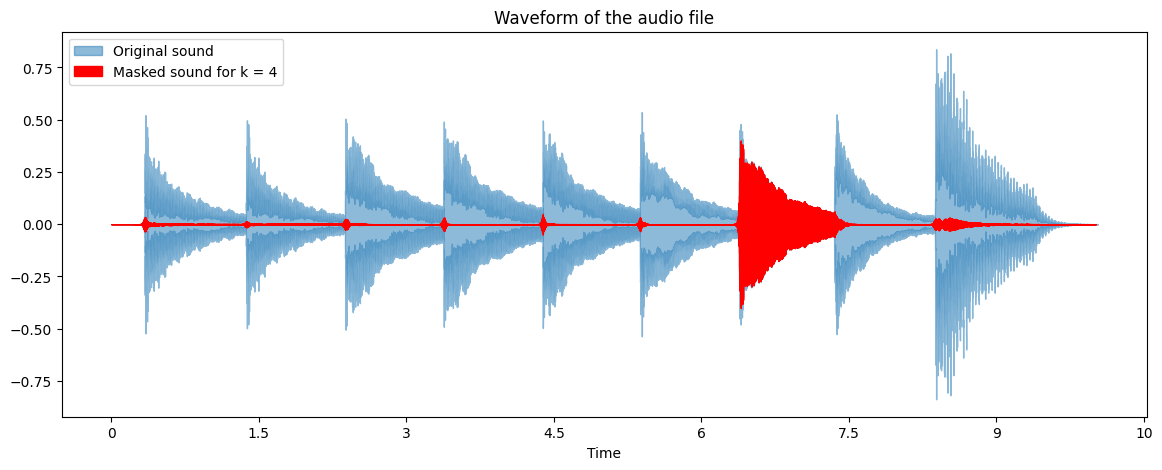

<Figure size 640x480 with 0 Axes>

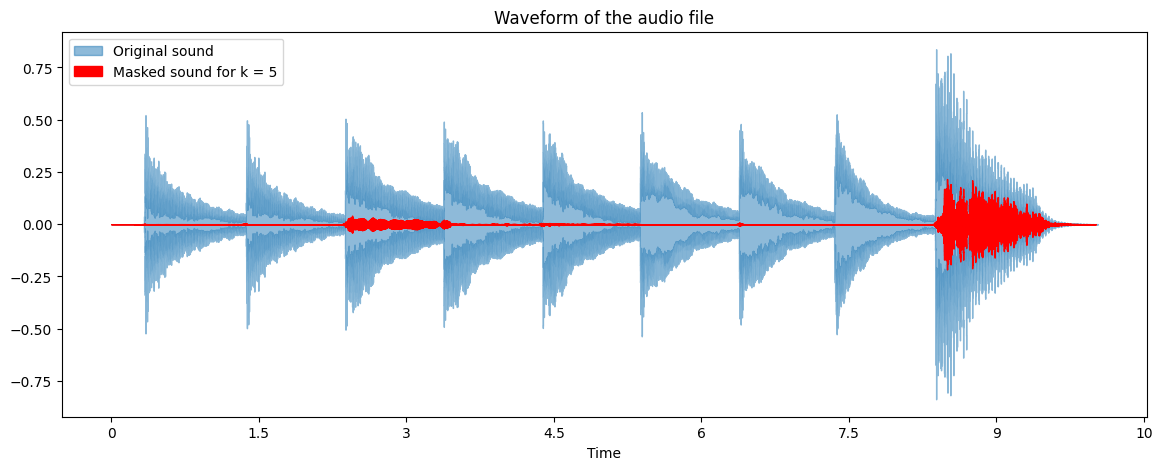

<Figure size 640x480 with 0 Axes>

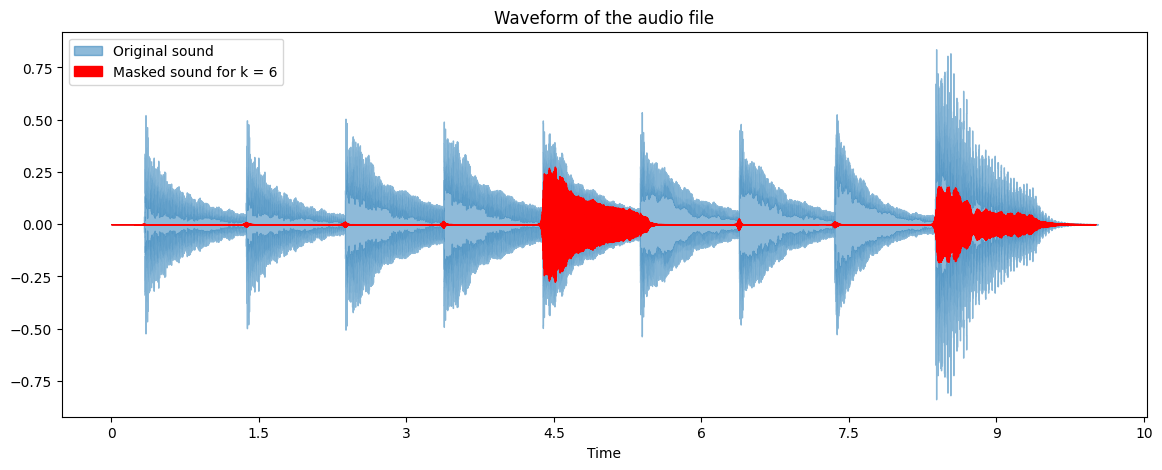

<Figure size 640x480 with 0 Axes>

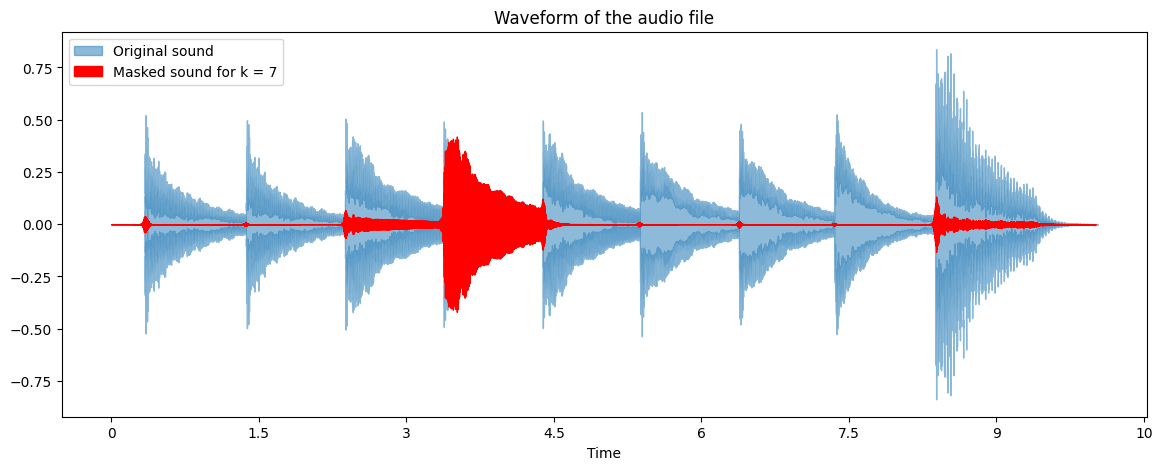

In [68]:
for k in range(1,8):
    filter_num = np.outer(W[:, k].reshape(-1), H[k, :].reshape(-1))
    filter_denom = W @ H
    filter = filter_num/filter_denom
    X_0 = np.multiply(Xstft, filter)
    y_hat = librosa.istft(X_0)
    plt.figure()
    plt.figure(figsize=(14, 5))
    plt.title('Waveform of the audio file')
    librosa.display.waveshow(y, sr=sr, alpha=0.5, label='Original sound')
    text = "Masked sound for k = " + str(k)
    librosa.display.waveshow(y_hat, sr=sr, color='r', label=text)
    plt.legend()

The algorithm works most of the time. There still are errors, but the notes are mostly isolated.

___

#### Experimenting with beta :

We will take $\beta = 1.1$ and $\beta = 3$ :

<Figure size 640x480 with 0 Axes>

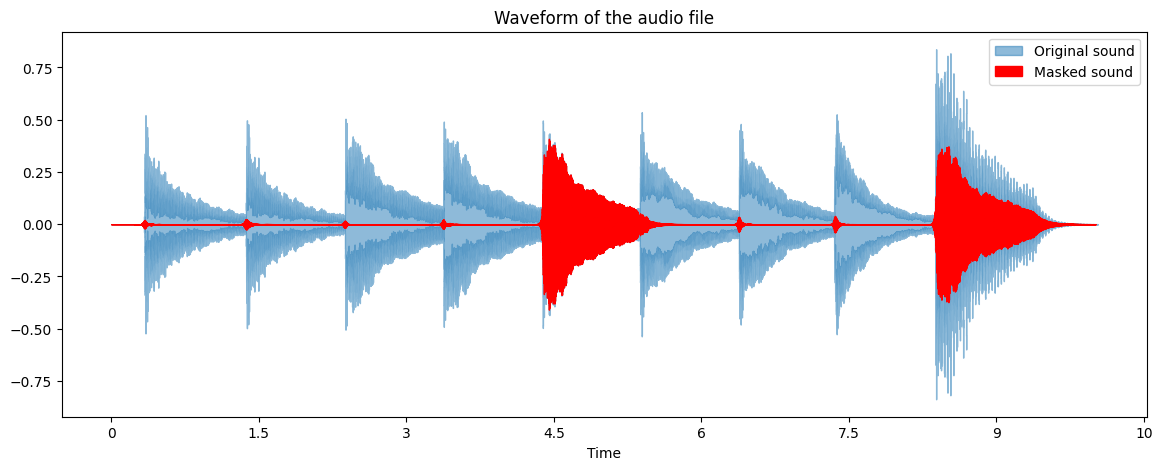

In [71]:
X = np.abs(Xstft)
K = 8
W = np.random.rand(X.shape[0], K)
H = np.random.rand(K, X.shape[1])
N = 30
beta = 1.1
errors = []
for k in range(N):
    W = W_update(X, W, H, beta)
    H = H_update(X, W, H, beta)
    errors.append(beta_divergence(X, W, H, beta))
    
filter_num = np.outer(W[:, 0].reshape(-1), H[0, :].reshape(-1))
filter_denom = W @ H
filter = filter_num/filter_denom
X_0 = np.multiply(Xstft, filter)
y_hat = librosa.istft(X_0)

plt.figure()
plt.figure(figsize=(14, 5))
plt.title('Waveform of the audio file')
librosa.display.waveshow(y, sr=sr, alpha=0.5, label='Original sound')
librosa.display.waveshow(y_hat, sr=sr, color='r', label='Masked sound')
plt.legend()

<Figure size 640x480 with 0 Axes>

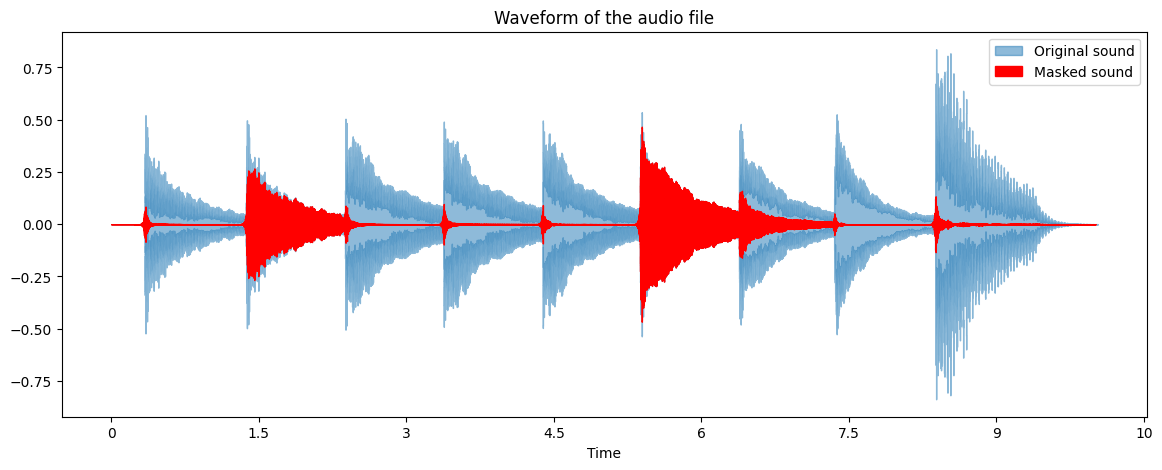

In [72]:
X = np.abs(Xstft)
K = 8
W = np.random.rand(X.shape[0], K)
H = np.random.rand(K, X.shape[1])
N = 30
beta = 3
errors = []
for k in range(N):
    W = W_update(X, W, H, beta)
    H = H_update(X, W, H, beta)
    errors.append(beta_divergence(X, W, H, beta))
    
filter_num = np.outer(W[:, 0].reshape(-1), H[0, :].reshape(-1))
filter_denom = W @ H
filter = filter_num/filter_denom
X_0 = np.multiply(Xstft, filter)
y_hat = librosa.istft(X_0)

plt.figure()
plt.figure(figsize=(14, 5))
plt.title('Waveform of the audio file')
librosa.display.waveshow(y, sr=sr, alpha=0.5, label='Original sound')
librosa.display.waveshow(y_hat, sr=sr, color='r', label='Masked sound')
plt.legend()

From the results we obtained, the lower the $\beta$ is, the better the result is. A higher $\beta$ coefficient seems not to be efficient for our MUR algorithm, since it picked up two distinct notes. The algorithm for the lower $\beta$ coefficient can be excused since the frequency selected can also be found in the last sound, being all the notes at the same time.
___

Experimenting with the number of columns in W :

We will take 3 columns, then 15. We had 8 previously. We will take $\beta = 2$

<Figure size 640x480 with 0 Axes>

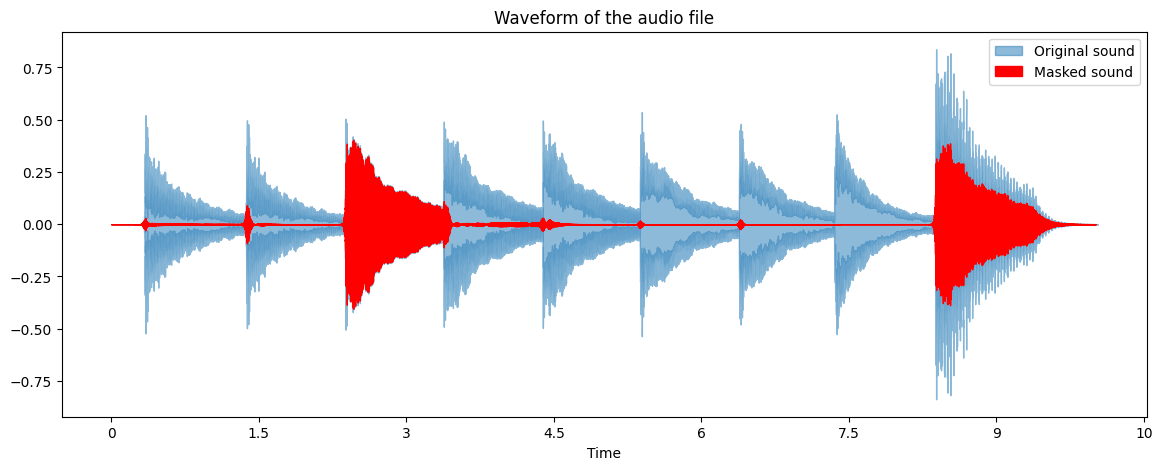

In [73]:
X = np.abs(Xstft)
K = 3
W = np.random.rand(X.shape[0], K)
H = np.random.rand(K, X.shape[1])
N = 30
beta = 2
errors = []
for k in range(N):
    W = W_update(X, W, H, beta)
    H = H_update(X, W, H, beta)
    errors.append(beta_divergence(X, W, H, beta))
    
filter_num = np.outer(W[:, 0].reshape(-1), H[0, :].reshape(-1))
filter_denom = W @ H
filter = filter_num/filter_denom
X_0 = np.multiply(Xstft, filter)
y_hat = librosa.istft(X_0)

plt.figure()
plt.figure(figsize=(14, 5))
plt.title('Waveform of the audio file')
librosa.display.waveshow(y, sr=sr, alpha=0.5, label='Original sound')
librosa.display.waveshow(y_hat, sr=sr, color='r', label='Masked sound')
plt.legend()

<Figure size 640x480 with 0 Axes>

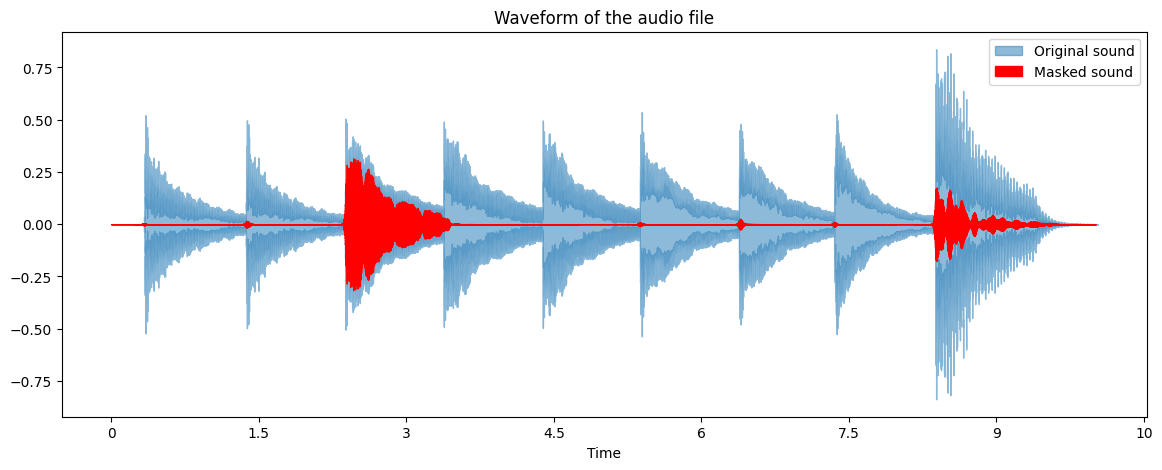

In [74]:
X = np.abs(Xstft)
K = 15
W = np.random.rand(X.shape[0], K)
H = np.random.rand(K, X.shape[1])
N = 30
beta = 2
errors = []
for k in range(N):
    W = W_update(X, W, H, beta)
    H = H_update(X, W, H, beta)
    errors.append(beta_divergence(X, W, H, beta))
    
filter_num = np.outer(W[:, 0].reshape(-1), H[0, :].reshape(-1))
filter_denom = W @ H
filter = filter_num/filter_denom
X_0 = np.multiply(Xstft, filter)
y_hat = librosa.istft(X_0)

plt.figure()
plt.figure(figsize=(14, 5))
plt.title('Waveform of the audio file')
librosa.display.waveshow(y, sr=sr, alpha=0.5, label='Original sound')
librosa.display.waveshow(y_hat, sr=sr, color='r', label='Masked sound')
plt.legend()

With a low value of K, the algorithm still performs well : it selects correctly a note, and also highlights it in the last sound (being all the notes).

However, with the higher value of K, we get an almost perfet selection of note, with the last being almost left completely out, and the separation being done beautifully on the other parts of the sound.

The value of the number of column in W doesn't impact much the computing time, but impacts the results drastically.

___

STFT hop size

At first, hop_length = 512

We will take hop_length = 256 and hop_length = 2048

<Figure size 640x480 with 0 Axes>

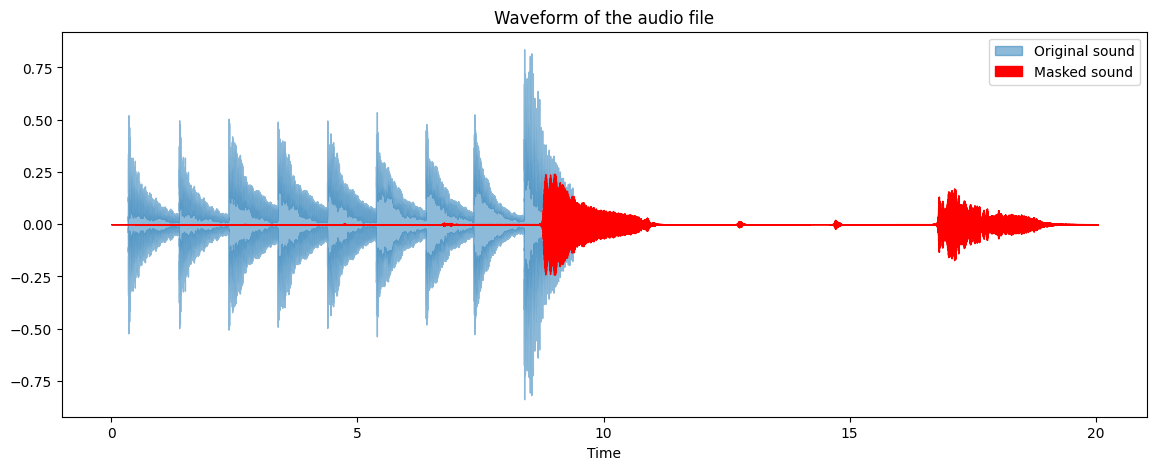

In [75]:
Xstft = librosa.stft(y, n_fft=2048, hop_length=256, win_length=None)
X = np.abs(Xstft)
K = 8
W = np.random.rand(X.shape[0], K)
H = np.random.rand(K, X.shape[1])
N = 30
beta = 2
errors = []
for k in range(N):
    W = W_update(X, W, H, beta)
    H = H_update(X, W, H, beta)
    errors.append(beta_divergence(X, W, H, beta))
    
filter_num = np.outer(W[:, 0].reshape(-1), H[0, :].reshape(-1))
filter_denom = W @ H
filter = filter_num/filter_denom
X_0 = np.multiply(Xstft, filter)
y_hat = librosa.istft(X_0)

plt.figure()
plt.figure(figsize=(14, 5))
plt.title('Waveform of the audio file')
librosa.display.waveshow(y, sr=sr, alpha=0.5, label='Original sound')
librosa.display.waveshow(y_hat, sr=sr, color='r', label='Masked sound')
plt.legend()

<Figure size 640x480 with 0 Axes>

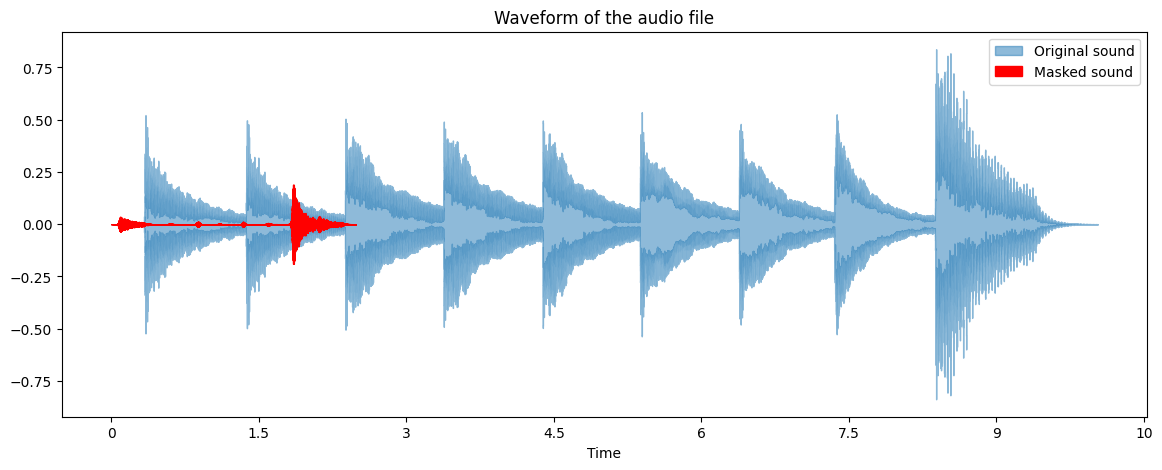

In [76]:
Xstft = librosa.stft(y, n_fft=2048, hop_length=2048, win_length=None)
X = np.abs(Xstft)
K = 8
W = np.random.rand(X.shape[0], K)
H = np.random.rand(K, X.shape[1])
N = 30
beta = 2
errors = []
for k in range(N):
    W = W_update(X, W, H, beta)
    H = H_update(X, W, H, beta)
    errors.append(beta_divergence(X, W, H, beta))
    
filter_num = np.outer(W[:, 0].reshape(-1), H[0, :].reshape(-1))
filter_denom = W @ H
filter = filter_num/filter_denom
X_0 = np.multiply(Xstft, filter)
y_hat = librosa.istft(X_0)

plt.figure()
plt.figure(figsize=(14, 5))
plt.title('Waveform of the audio file')
librosa.display.waveshow(y, sr=sr, alpha=0.5, label='Original sound')
librosa.display.waveshow(y_hat, sr=sr, color='r', label='Masked sound')
plt.legend()

By modifying the hop size of the STFTs, we end up seemingly with a speeded up/slowed down signal. Therefore the separation doesn't seem to fit the signal, but still it seems to work.

Even though the scale is not correct, the MUR algorithm seems to find a frequency component. Thus we should keep this parameter unchanged, but it doesn't seem to impact the algorithm's performances.

___

Lastly, the STFT window size :

We previoulsy had none, I will use win_length = 512 and win_length = 1024

<Figure size 640x480 with 0 Axes>

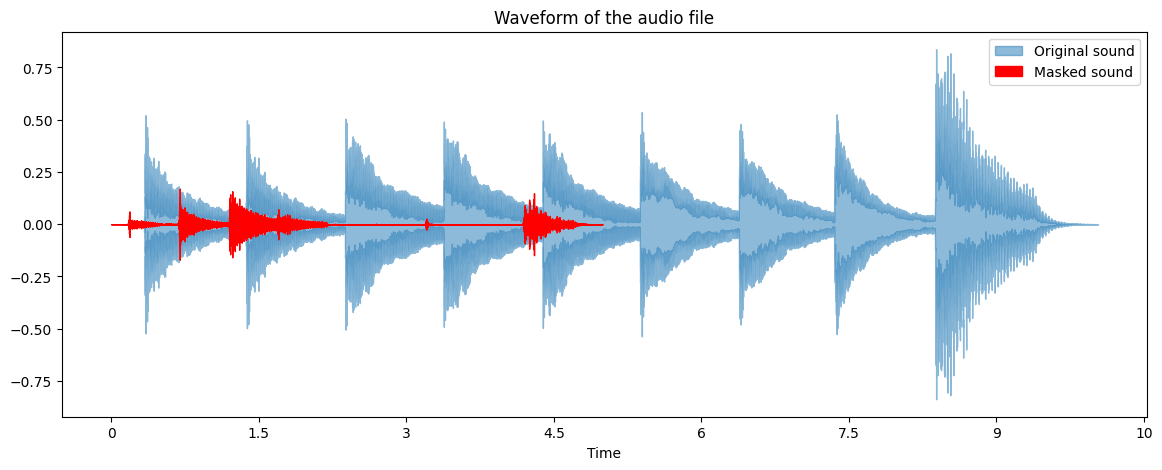

In [85]:
Xstft = librosa.stft(y, n_fft=2048, hop_length=1024, win_length=512)
X = np.abs(Xstft)
K = 8
W = np.random.rand(X.shape[0], K)
H = np.random.rand(K, X.shape[1])
N = 30
beta = 2
errors = []
for k in range(N):
    W = W_update(X, W, H, beta)
    H = H_update(X, W, H, beta)
    errors.append(beta_divergence(X, W, H, beta))
    
filter_num = np.outer(W[:, 0].reshape(-1), H[0, :].reshape(-1))
filter_denom = W @ H
filter = filter_num/filter_denom
X_0 = np.multiply(Xstft, filter)
y_hat = librosa.istft(X_0)

plt.figure()
plt.figure(figsize=(14, 5))
plt.title('Waveform of the audio file')
librosa.display.waveshow(y, sr=sr, alpha=0.5, label='Original sound')
librosa.display.waveshow(y_hat, sr=sr, color='r', label='Masked sound')
plt.legend()

<Figure size 640x480 with 0 Axes>

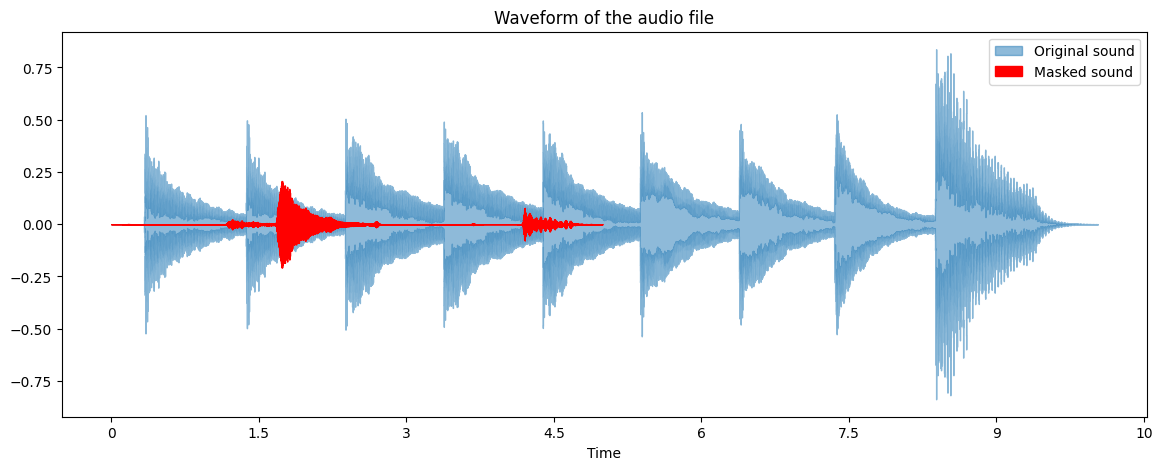

In [86]:
Xstft = librosa.stft(y, n_fft=2048, hop_length=1024, win_length=1024)
X = np.abs(Xstft)
K = 8
W = np.random.rand(X.shape[0], K)
H = np.random.rand(K, X.shape[1])
N = 30
beta = 2
errors = []
for k in range(N):
    W = W_update(X, W, H, beta)
    H = H_update(X, W, H, beta)
    errors.append(beta_divergence(X, W, H, beta))
    
filter_num = np.outer(W[:, 0].reshape(-1), H[0, :].reshape(-1))
filter_denom = W @ H
filter = filter_num/filter_denom
X_0 = np.multiply(Xstft, filter)
y_hat = librosa.istft(X_0)

plt.figure()
plt.figure(figsize=(14, 5))
plt.title('Waveform of the audio file')
librosa.display.waveshow(y, sr=sr, alpha=0.5, label='Original sound')
librosa.display.waveshow(y_hat, sr=sr, color='r', label='Masked sound')
plt.legend()

The window size seems to reduce a lot the computing time, but also impacts the algorithm performances. Again, it looks like it speed up the sound, but the frequency are being identified, just not as accurately as without the windowing of our sound.

___

To conclude, if we don't really care about computing time, what seems to work best is a high number of iterations and a high value of columns for W. $\beta$ coefficient doesn't seem to be as impactful on the results of the MUR algorithm as the number of columns, or any other parameters.